<center><font color='#7a7773'><h1> Historical weather analyses Rotterdam</h1></font></center>

<img src='clouds.svg' width=250> 

<h4> Import the packages that are needed in this project </h4>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [1]:
import requests
import pandas as pd
import json
import time
from datetime import datetime
import os
import matplotlib.pyplot as plt

<h4> vanuit de directory, filter de JSON files, zodat je alleen deze kan importeren </h4>

In [2]:
files = list()

for file in os.listdir():
    if file.endswith('.json'):
        files.append(file)
                
files = sorted(files, key=str.lower)

In [3]:
files

['city_list.json', 'History_Bulk_Rotterdam_2013_2017.json']

In [4]:
with open(files[0], encoding='utf-8') as f:
    citylist = json.load(f)
    
with open(files[1], encoding='utf-8') as f:
    weatherdata = json.load(f)

In [5]:
print('lengte weather data =',len(weatherdata))
print('lengte citylyst =',len(citylist))

lengte weather data = 41273
lengte citylyst = 209579


In [6]:
citylist

[{'id': 707860,
  'name': 'Hurzuf',
  'country': 'UA',
  'coord': {'lon': 34.283333, 'lat': 44.549999}},
 {'id': 519188,
  'name': 'Novinki',
  'country': 'RU',
  'coord': {'lon': 37.666668, 'lat': 55.683334}},
 {'id': 1283378,
  'name': 'Gorkhā',
  'country': 'NP',
  'coord': {'lon': 84.633331, 'lat': 28}},
 {'id': 1270260,
  'name': 'State of Haryāna',
  'country': 'IN',
  'coord': {'lon': 76, 'lat': 29}},
 {'id': 708546,
  'name': 'Holubynka',
  'country': 'UA',
  'coord': {'lon': 33.900002, 'lat': 44.599998}},
 {'id': 1283710,
  'name': 'Bāgmatī Zone',
  'country': 'NP',
  'coord': {'lon': 85.416664, 'lat': 28}},
 {'id': 529334,
  'name': 'Mar’ina Roshcha',
  'country': 'RU',
  'coord': {'lon': 37.611111, 'lat': 55.796391}},
 {'id': 1269750,
  'name': 'Republic of India',
  'country': 'IN',
  'coord': {'lon': 77, 'lat': 20}},
 {'id': 1283240,
  'name': 'Kathmandu',
  'country': 'NP',
  'coord': {'lon': 85.316666, 'lat': 27.716667}},
 {'id': 703363,
  'name': 'Laspi',
  'country': '

In [7]:
for i in citylist:
    if i['name'] == 'Rotterdam' and i['country'] == 'NL':
        print(i)
        print(i['id'], i['name'])
        cityname = i['name']
        cityid = i['id']

{'id': 2747891, 'name': 'Rotterdam', 'country': 'NL', 'coord': {'lon': 4.47917, 'lat': 51.922501}}
2747891 Rotterdam


In [8]:
weatherdata

[{'city_id': 2747891,
  'main': {'temp': 288.45,
   'temp_min': 287.15,
   'temp_max': 289.82,
   'pressure': 1020,
   'humidity': 91},
  'wind': {'speed': 2, 'deg': 208},
  'clouds': {'all': 0},
  'weather': [{'id': 701,
    'main': 'Mist',
    'description': 'mist',
    'icon': '50n'}],
  'dt': 1377907200,
  'dt_iso': '2013-08-31 00:00:00 +0000 UTC'},
 {'city_id': 2747891,
  'main': {'temp': 288.69,
   'temp_min': 288.15,
   'temp_max': 289.26,
   'pressure': 1020,
   'humidity': 93},
  'wind': {'speed': 2, 'deg': 208},
  'clouds': {'all': 0},
  'weather': [{'id': 701,
    'main': 'Mist',
    'description': 'mist',
    'icon': '50n'}],
  'dt': 1377910800,
  'dt_iso': '2013-08-31 01:00:00 +0000 UTC'},
 {'city_id': 2747891,
  'main': {'temp': 289.45,
   'temp_min': 288.71,
   'temp_max': 290.15,
   'pressure': 1019,
   'humidity': 95},
  'wind': {'speed': 3, 'deg': 218},
  'clouds': {'all': 0},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'Sky is Clear',
    'icon'

In [10]:
temp = list()
temp_min = list()
temp_max = list()
pressure = list()
humidity = list()
wind_speed = list()
wind_deg = list()
weather_id = list()
weather_main = list()
weather_descr = list()
date = list()
date_unix = list()


for entry in weatherdata:
    temp.append(entry['main']['temp'])
    temp_min.append(entry['main']['temp_min'])
    temp_max.append(entry['main']['temp_max'])
    pressure.append(entry['main']['pressure'])
    humidity.append(entry['main']['humidity'])
    wind_speed.append(entry['wind']['speed'])
    wind_deg.append(entry['wind']['deg'])
    weather_id.append(entry['weather'][0]['id'])
    weather_main.append(entry['weather'][0]['main'])
    weather_descr.append(entry['weather'][0]['description'])
    date.append(entry['dt_iso'])
    date_unix.append(entry['dt'])

hier maak ik een tabel van mijn JSON bestand

In [11]:
weatherdata_df = pd.DataFrame()

weatherdata_df['temperature_celsius'] = temp
weatherdata_df['temperature_min_celsius'] = temp_min
weatherdata_df['temperature_max_celsius'] = temp_max
weatherdata_df['pressure_hpa'] = pressure
weatherdata_df['humidity_%'] = humidity
weatherdata_df['wind_speed_m/s'] = wind_speed
weatherdata_df['wind_degrees'] = wind_deg
weatherdata_df['weather_id'] = weather_id
weatherdata_df['weather_main'] = weather_main
weatherdata_df['weather_descr'] = weather_descr
weatherdata_df['date_UTC'] = date
weatherdata_df['date_unix'] = date_unix


In [12]:
weatherdata_df

,temperature_celsius,temperature_min_celsius,temperature_max_celsius,pressure_hpa,humidity_%,wind_speed_m/s,wind_degrees,weather_id,weather_main,weather_descr,date_UTC,date_unix
0,288.45,287.15,289.82,1020,91,2,208,701,Mist,mist,2013-08-31 00:00:00 +0000 UTC,1377907200
1,288.69,288.15,289.26,1020,93,2,208,701,Mist,mist,2013-08-31 01:00:00 +0000 UTC,1377910800
2,289.45,288.71,290.15,1019,95,3,218,800,Clear,Sky is Clear,2013-08-31 02:00:00 +0000 UTC,1377914400
3,288.42,288.15,288.71,1019,99,3,218,701,Mist,mist,2013-08-31 03:00:00 +0000 UTC,1377918000
4,287.88,287.59,288.15,1019,99,3,218,701,Mist,mist,2013-08-31 04:00:00 +0000 UTC,1377921600
5,288.15,288.15,288.15,1019,99,4,218,701,Mist,mist,2013-08-31 05:00:00 +0000 UTC,1377925200
6,287.10,287.04,287.15,1022,96,5,285,803,Clouds,broken clouds,2013-09-02 04:00:00 +0000 UTC,1378094400
7,288.15,288.15,288.15,1023,77,4,280,804,Clouds,overcast clouds,2013-09-02 05:00:00 +0000 UTC,1378098000
8,288.71,288.71,288.71,1022,91,5,285,803,Clouds,broken clouds,2013-09-02 06:00:00 +0000 UTC,1378101600
9,290.29,289.15,291.48,1022,81,1,326,300,Drizzle,light intensity drizzle,2013-09-02 08:00:00 +0000 UTC,1378108800


In [13]:
def kelv_to_cels(df, column):
    df[column] = df[column] - 273.15    

In [14]:
kelv_to_cels(weatherdata_df, 'temperature_celsius')
kelv_to_cels(weatherdata_df, 'temperature_min_celsius')
kelv_to_cels(weatherdata_df, 'temperature_max_celsius')

In [15]:
weatherdata_df.dtypes

temperature_celsius        float64
temperature_min_celsius    float64
temperature_max_celsius    float64
pressure_hpa                 int64
humidity_%                   int64
wind_speed_m/s               int64
wind_degrees                 int64
weather_id                   int64
weather_main                object
weather_descr               object
date_UTC                    object
date_unix                    int64
dtype: object

In [16]:
weatherdata_df['date_unix'] = pd.to_datetime(weatherdata_df['date_unix'], unit='s')
weatherdata_df['date_UTC'] = weatherdata_df['date_UTC'].map(lambda x: x.replace('UTC', ''))
weatherdata_df['date_UTC'] = weatherdata_df['date_UTC'].map(lambda x: x.replace('+', ''))
weatherdata_df['date_UTC'] = weatherdata_df['date_UTC'].map(lambda x: x[:-5])

In [17]:
weatherdata_df['date_UTC'] = pd.to_datetime(weatherdata_df['date_UTC'], format='%Y-%m-%d %H:%M:%S')

In [18]:
weatherdata_df.head()

,temperature_celsius,temperature_min_celsius,temperature_max_celsius,pressure_hpa,humidity_%,wind_speed_m/s,wind_degrees,weather_id,weather_main,weather_descr,date_UTC,date_unix
0,15.30,14.00,16.67,1020,91,2,208,701,Mist,mist,2013-08-31 00:00:00,2013-08-31 00:00:00
1,15.54,15.00,16.11,1020,93,2,208,701,Mist,mist,2013-08-31 01:00:00,2013-08-31 01:00:00
2,16.30,15.56,17.00,1019,95,3,218,800,Clear,Sky is Clear,2013-08-31 02:00:00,2013-08-31 02:00:00
3,15.27,15.00,15.56,1019,99,3,218,701,Mist,mist,2013-08-31 03:00:00,2013-08-31 03:00:00
4,14.73,14.44,15.00,1019,99,3,218,701,Mist,mist,2013-08-31 04:00:00,2013-08-31 04:00:00


In [19]:
weatherdata_df.dtypes

temperature_celsius               float64
temperature_min_celsius           float64
temperature_max_celsius           float64
pressure_hpa                        int64
humidity_%                          int64
wind_speed_m/s                      int64
wind_degrees                        int64
weather_id                          int64
weather_main                       object
weather_descr                      object
date_UTC                   datetime64[ns]
date_unix                  datetime64[ns]
dtype: object

In [20]:
df_described = round(weatherdata_df.describe(), 2)
df_described

,temperature_celsius,temperature_min_celsius,temperature_max_celsius,pressure_hpa,humidity_%,wind_speed_m/s,wind_degrees,weather_id
count,41273.00,41273.00,41273.00,41273.00,41273.00,41273.00,41273.00,41273.00
mean,11.97,10.65,13.44,1015.71,81.41,3.94,189.44,691.84
std,6.48,6.19,6.96,10.45,15.63,2.55,96.78,150.33
min,-7.39,-10.00,-7.00,968.00,0.00,0.00,0.00,200.00
25%,7.00,6.00,8.00,1010.00,72.00,2.00,110.00,521.00
50%,12.21,11.00,13.36,1016.00,86.00,4.00,203.00,800.00
75%,16.61,15.00,18.33,1022.00,93.00,5.00,260.00,802.00
max,34.58,33.33,38.33,1052.00,100.00,57.00,360.00,804.00


In [21]:
two_fourteen = weatherdata_df[weatherdata_df['date_UTC'].dt.year == 2014]
two_fifteen  = weatherdata_df[weatherdata_df['date_UTC'].dt.year == 2015]
two_sixteen  = weatherdata_df[weatherdata_df['date_UTC'].dt.year == 2016]
two_seventeen  = weatherdata_df[weatherdata_df['date_UTC'].dt.year == 2017]
two_eighteen  = weatherdata_df[weatherdata_df['date_UTC'].dt.year == 2018]

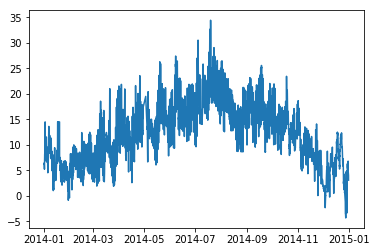

In [22]:
plt.plot(two_fourteen['date_UTC'], two_fourteen['temperature_celsius'])
plt.show()

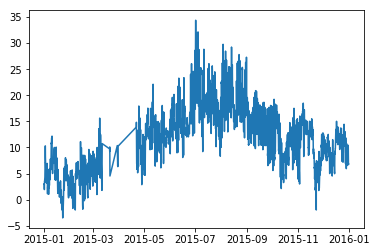

In [23]:
plt.plot(two_fifteen['date_UTC'], two_fifteen['temperature_celsius'])
plt.show()

In [ ]:
apikey = 'db071ece9a338a36e9d7a660ec4f0e37'
start = 1262304000
end = 1533081600

In [ ]:
response = requests.get(f'http://api.openweathermap.org/data/2.5/forecast?id={countryid}&APPID={apikey}').content.decode('utf-8')

In [ ]:
response

In [ ]:
data = json.loads(response)

In [ ]:
data

In [ ]:
weather = data['list']

In [ ]:
temp = list()
temp_min = list()
temp_max = list()
pressure = list()
sea_level = list()
humidity = list()


for entry in data['list']:
    print(entry)